In [1]:
# You must include this next line for the ImageTool to show up!
%gui qt
from pyimagetool import imagetool  # workhorse function
# only need these packages for data you create with meaningful axes
from pyimagetool import RegularDataArray
import numpy as np

# Generate Data

In [2]:
x = np.linspace(-1, 1, 51)
y = np.linspace(-1, 1, 51)
xy = np.meshgrid(x, y, indexing='ij')
z = np.sin(np.pi*np.exp(-1*(xy[0]**2 + xy[1]**2)))*np.cos(np.pi/2*xy[1])
data = RegularDataArray(z, delta=[x[1] - x[0], y[1] - y[0]], coord_min=[x[0], y[0]])

# Create an ImageTool object

In [3]:
tool = imagetool(data)

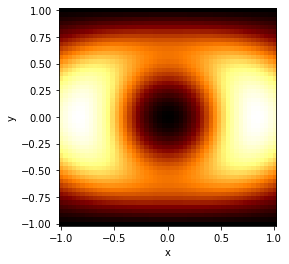

In [4]:
tool.get('xy').plot(cmap='afmhot')

# Controls
- Hold shift to drag the cursors to mouse location.
- While hovering over the cursor index or cursor coordinate spinbox, use the middle mouse wheel to move by increments of 1
- Hold control and scroll middle mouse wheel to move by increments of 10
- Left-click and drag to move image/plot
- Right-click and drag to resize (horizontal drag resizes horizontally, vertical drag resizes vertically)
- Ctrl+A will undo manipulations to view all data
- Right-click to open a menu.
  - If you right-click on an image, you can set aspect ratio and make quick edits to the colormap
  - You can export images and line cuts to png files
- If you return the ImageTool object to a variabel in the Python kernel, you can access a slice of the data at any time using the tool.get() function. See above for example.

## Editing Colormaps
- Right-click image, hover over "Color Map" and select "Edit Color Map"
- Color map normalizations on top, choices are "Power Law" or "Piecewise." Power law useful for quickly rescaling to make weak features stronger or vice versa with the gamma control, but piecewise gives you much more control.
- You can always see how the colormap is changing in the top right image of the colorbar.
- Bottom right is a histogram of the data. The x-axis is the value in the data and the y-axis is normalized weight at that value. For example, an image of a gaussian (z = exp(-x^2-y^2)) would have a large amount of weight at x-axis=0 falling off rapidly to almost zero at x-axis=1 (because there is only one point where z = 1 which is at x=0, y=0 in the image).
- You can scan the vertical bar in the histogram which controls the isocurve level. Because the algorithm that computes the isocurve is pure python, it is slow. If the tool noticeably slows down, consider disabling the isocurve calculations by unticking the box in the top left.
- In addition to the histogram, a line is drawn representing how values in your data is mapped to the colorbar. Imagine the colorbar is the y-axis and values in the image are on the x-axis. By default, color scales are linear. As you change gamma in power-law mode, you will see this curve become nonlinear, as the colorbar will noticeably deform.
- If the color map editor is in piecewise mode, you can drag points representing the max and min of the color scale. Furthermore, by right-clicking in the histogram area, you can add more points. This is useful for forcing your colorbar to highlight a region between two isosurfaces.